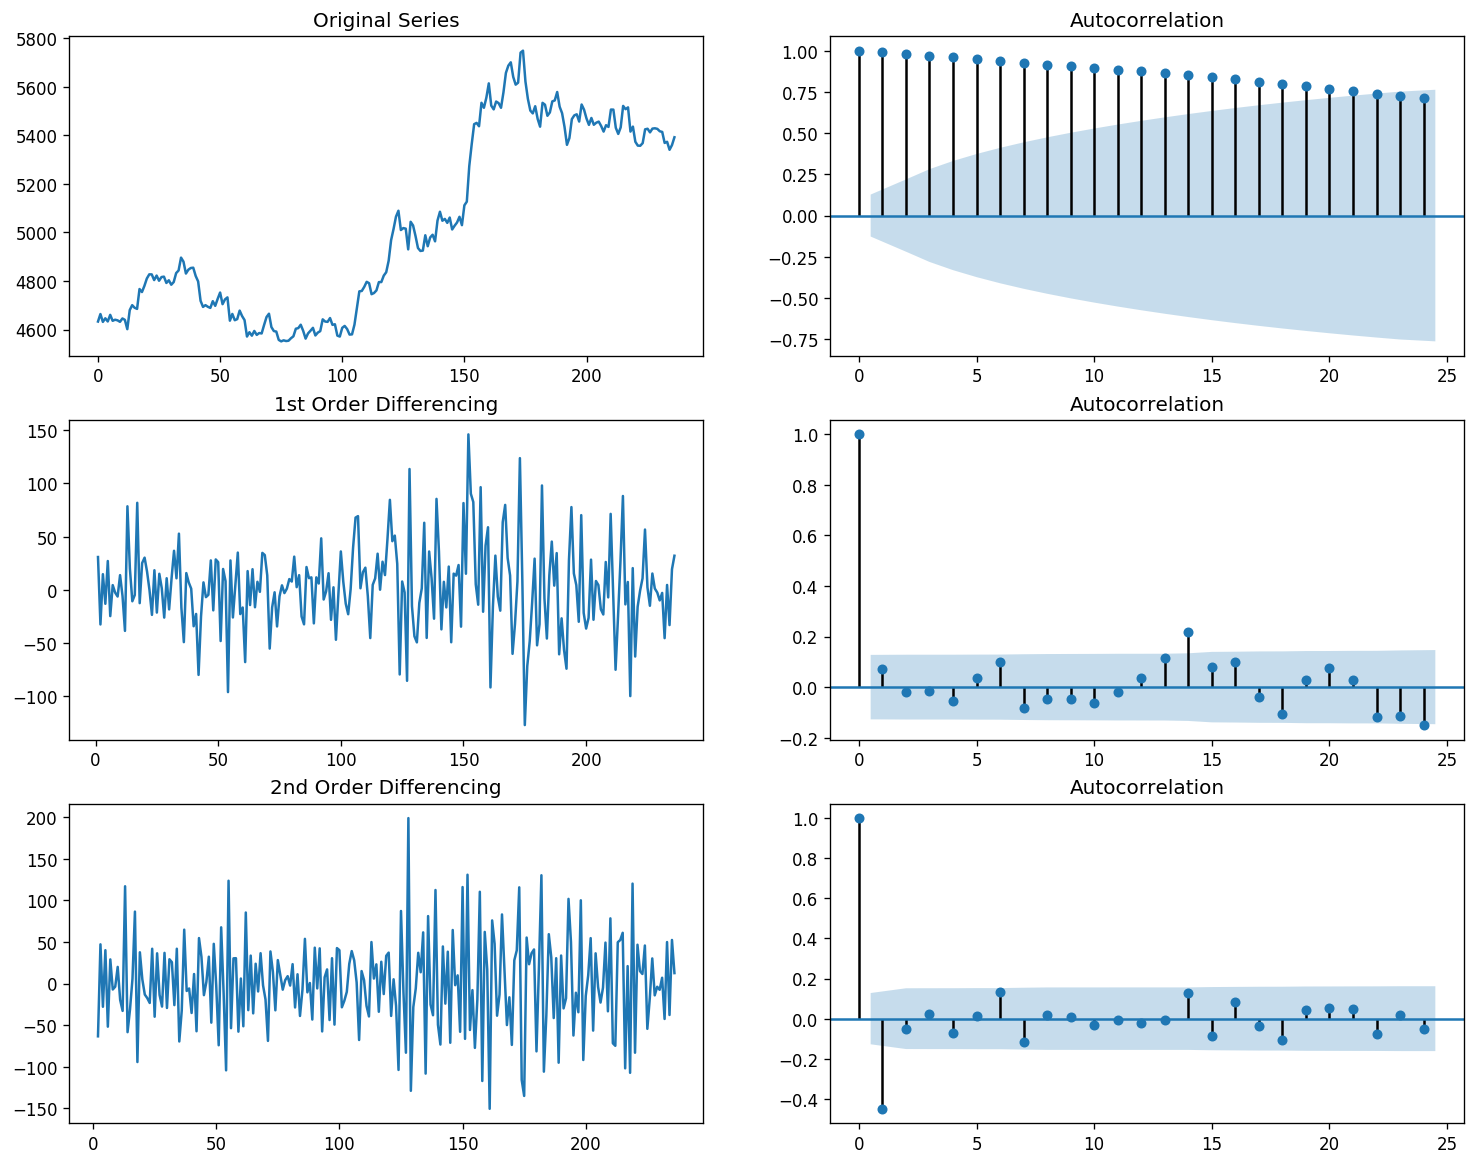

In [52]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import datetime
plt.rcParams.update({'figure.figsize':(15,12), 'figure.dpi':120})

# Import data
df = pd.read_csv("Gold_history_data.csv", parse_dates=['Date'])
df= df[df['Date'] > datetime.datetime.strptime('2019-01-01','%Y-%m-%d')]
df= df[df['Date'] < datetime.datetime.strptime('2019-12-01','%Y-%m-%d')]
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df = df.rename(columns={'Price_g':'value'})
df = df[['value']]
df= df.reset_index()
df.value = df.value.apply(lambda x: float(x.replace(',','')))
# print(type(df.value.tolist()[0]))
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()